In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('..'))
from functions import *
from models import *
from optimizers import *
from utils import *
from settings import *

In [ ]:
path_letters_train = r'\Image-Text-Generator-with-numpy\datasets\EMNIST\emnist-letters-train.csv'
path_letters_test = r'\Image-Text-Generator-with-numpy\datasets\EMNIST\emnist-letters-test.csv'

path_digits_train = r'\Image-Text-Generator-with-numpy\datasets\EMNIST\emnist-digits-train.csv'
path_digits_test = r'\Image-Text-Generator-with-numpy\datasets\EMNIST\emnist-digits-test.csv'

In [3]:
letters_train = np.array(pd.read_csv(path_letters_train).values)
letters_test = np.array(pd.read_csv(path_letters_test).values)

digits_train = np.array(pd.read_csv(path_digits_train).values)
digits_test = np.array(pd.read_csv(path_digits_test).values)

In [4]:
letters = np.concatenate([
    letters_train[:, 1:],
    letters_test[:, 1:]
], axis=0).reshape(-1, 28, 28).transpose(0, 2, 1).reshape(-1, 28*28).astype(DTYPE) / 255.0

digits = np.concatenate([
    digits_train[:, 1:],
    digits_test[:, 1:]
], axis=0).reshape(-1, 28, 28).transpose(0, 2, 1).reshape(-1, 28*28).astype(DTYPE) / 255.0

In [5]:
total_data = np.concatenate([letters, digits], axis=0)

In [6]:
total_data = shuffle_data(total_data)

In [7]:
print(total_data.shape)

(383596, 784)


In [8]:
vae = VAE(
    n_inputs=total_data.shape[1],
    z_dim=128,
    neurons=64,
    n_outputs=total_data.shape[1],
    first_activation=LeakyReLU,
    second_activation=ReLU,
    last_activation=sigmoid,
    dtype=DTYPE,
    name="VAE chars"
)

vae.compile(
    optimizer=Adam(lr=0.001)
)

In [9]:
vae.train(total_data, epochs=10, batch_size=32, shuffle=True)

Epoch: [1/10] Avg Loss: 0.2902 | Avg KL Loss: 0.0939
Epoch: [2/10] Avg Loss: 0.2962 | Avg KL Loss: 0.1305
Epoch: [3/10] Avg Loss: 0.2991 | Avg KL Loss: 0.1367
Epoch: [4/10] Avg Loss: 0.3003 | Avg KL Loss: 0.1396
Epoch: [5/10] Avg Loss: 0.3009 | Avg KL Loss: 0.1411
Epoch: [6/10] Avg Loss: 0.3010 | Avg KL Loss: 0.1418
Epoch: [7/10] Avg Loss: 0.3011 | Avg KL Loss: 0.1423
Epoch: [8/10] Avg Loss: 0.3010 | Avg KL Loss: 0.1427
Epoch: [9/10] Avg Loss: 0.3010 | Avg KL Loss: 0.1432
Epoch: [10/10] Avg Loss: 0.3012 | Avg KL Loss: 0.1438


In [37]:
choose_digit = False
rand_image = digits[np.random.randint(0, digits.shape[0])] if choose_digit else letters[np.random.randint(0, letters.shape[0])]

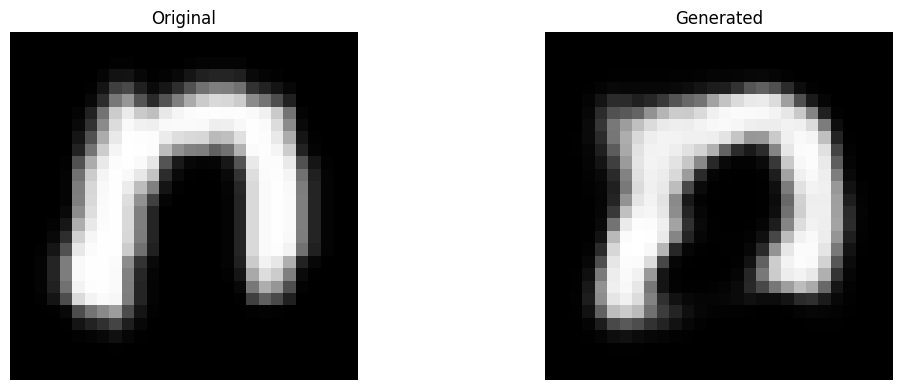

In [49]:
reconstruction= vae.forward(rand_image)[0]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(rand_image.reshape(28, 28), cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(reconstruction.reshape(28, 28), cmap='gray')
axes[1].set_title("Generated")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
vae.save(path=r'\Image-Text-Generator-with-numpy\models\char_VAE.ot')